In [1]:
# Dependencies and library
import colorsys
import copy
import numpy as np
import re
from Bio import SeqIO
from io import BytesIO
import cairo
import math
import IPython.display

In [2]:
# Original user input
start = 4000; stop = 7400

In [150]:
cds = []
genes = []
a = 0
f = open("gak.gb", "r")
for line in f:
    if bool(re.search("CDS", line)):
        res = [int(i) for i in re.split("[^0-9]", line) if i.isdigit()]
        
        if "complement" in re.split("\s+|\(", line):
            res[0],res[1] = res[1],res[0]
        cds.append(res)
    if bool(re.search("/gene", line)):
        gen = re.split("\"", line)
        genes.append(gen[1])
f.close()
# Removes every even indexed item as every gene has two mentions in my genbank file
genes_uniq = genes[::2]

# Appending the gene name to each list item with the corresponding coordinates
for i in range(len(genes_uniq)):
    cds[i].append(genes_uniq[i])

In [151]:
# Returns only the genes within the range set by start and stop, user input, returns cds_keep
counter = 0
vals = []
cds_keep = []
cds_names = []
for i in range(len(cds)):
    for j in range(len(cds[i])-1):
        if start <= cds[i][j] <= stop:
            counter += 1
    if counter > 1:
        cds_keep.append(cds[i])
        cds_names.append(cds[i][-1])
    counter = 0

In [364]:
# Generates a list of unique colors for each orf to be drawn:
numcolors = len(cds_keep)
HSV_tuples = [(x*1.0/numcolors, 0.5, 0.5) for x in range(numcolors)]
RGB_tuples = map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples)
colorlist = list(RGB_tuples)

In [152]:
# Subtracts the position of the first ORF from all positions to make coordinates relative.
cds_test = copy.deepcopy(cds_keep)
minval = min(cds_keep[0][0:2])
maxval = max(cds_keep[-1][0:2])
for n in range(len(cds_keep)):
    for m in range(len(cds_keep[n])-1):
        cds_test[n][m] = cds_keep[n][m] - minval

In [295]:
# Draws a forward arrow of *length* and starting x, y. Makes a global variable "f_endpos" for the end position of forward arrow.
def myarrow(context, x, y, length):
    context.move_to(x, y)
    
    x += 0; y -= 23.8
    context.line_to(x, y)
    
    x += length; y += 0
    context.line_to(x, y)
    
    x += 0; y -= 20
    context.line_to(x, y)
    
    x += 33.8; y += 44.1
    context.line_to(x, y)
    
    global f_endpos
    f_endpos = context.get_current_point()
    
    x -= 33.8; y += 44.1
    context.line_to(x, y)
    
    x += 0; y -= 20
    context.line_to(x, y)
    
    x -= length; y += 0
    context.line_to(x, y)
    
    context.close_path()

def myrarrow(rev, x, y, length):
    rev.move_to(x, y)
    
    x += 33.7; y += 44.1
    rev.line_to(x, y)
    
    x += 0; y -= 20
    rev.line_to(x, y)
    
    x += length; y += 0
    rev.line_to(x, y)
    
    x += 0; y -= 23.8
    rev.line_to(x, y)
    
    global f_endpos
    f_endpos = rev.get_current_point()
    
    x += 0; y -= 23.8
    rev.line_to(x, y)
    
    x -= length; y -= 0
    rev.line_to(x, y)
    
    x -= 0; y -= 20
    rev.line_to(x, y)
    
    x += -33.7; y += 43.5
    rev.line_to(x, y)

    rev.close_path()

(-13.80859375, 124.13671875)


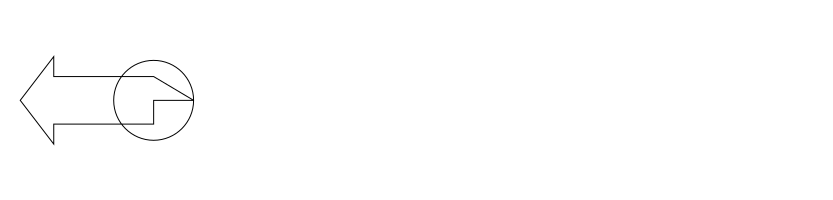

In [204]:
# Draws a reverse arrow
side_a = 80*math.sin(math.radians(25))/math.sin(math.radians(130))
angle2 = ((2*side_a)*math.sin(math.radians(130)))/2

cwidth = (maxval/10)+100; cheight = 200
with cairo.SVGSurface("geek101.svg", cwidth, cheight) as surface:
    rev = cairo.Context(surface)
    
    x = 20; y = 100
    rev.move_to(x, y)
    
    x += angle2; y += 44.13512
    rev.line_to(x, y)
    
    x += 0; y -= 20
    rev.line_to(x, y)
    
    x += 100; y += 0
    rev.line_to(x, y)
    
    x += 0; y -= 23.8
    rev.line_to(x, y)
    rev.arc(x, y, 40, 0, 2*math.pi)

    print(context.get_current_point())
    
    x += 0; y -= 23.8
    rev.line_to(x, y)
    
    x -= 100; y -= 0
    rev.line_to(x, y)
    
    x -= 0; y -= 20
    rev.line_to(x, y)
    
    x += -angle2; y += 44.13512
    rev.line_to(x, y)
    
    rev.set_line_width(1)
    rev.set_source_rgb(0, 0, 0)
    rev.stroke()
    #rev.close_path()
    
IPython.display.SVG("geek101.svg")

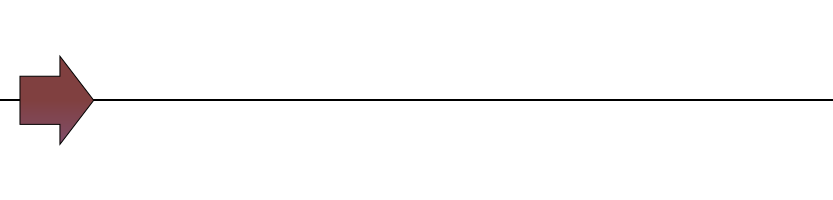

In [9]:
cwidth = (maxval/10)+100; cheight = 200
with cairo.SVGSurface("geek95.svg", cwidth, cheight) as surface: 
    x = 10; a = 12.5; b = 10; y = (cheight/2)-(a+b); width = 25; height = 45
    # ctx = cairo.Context(surface)
    ctx2 = cairo.Context(surface)
    line = cairo.Context(surface)
    line.move_to(0, cheight/2) 
    line.line_to(maxval/2, cheight/2) 
    line.stroke()
    
    pattern = cairo.LinearGradient(200, 100, 200, 300)
    pattern.add_color_stop_rgb(0, *list(colorlist[0]))
    pattern.add_color_stop_rgb(1, 0.5, 0.5, 1)
    ctx2.set_source(pattern)

    myarrow(ctx2, 20, 100, 40)
    ctx2.fill_preserve()
    ctx2.set_line_width(1)
    ctx2.set_source_rgb(0, 0, 0)
    ctx2.stroke()
    
IPython.display.SVG("geek95.svg")

0
1
2


(20.0, 200.0)
(20.0, 176.0)
(120.0, 176.0)
(120.0, 156.0)
(153.80859375, 200.13671875)
(120.0, 244.26953125)
(120.0, 224.26953125)


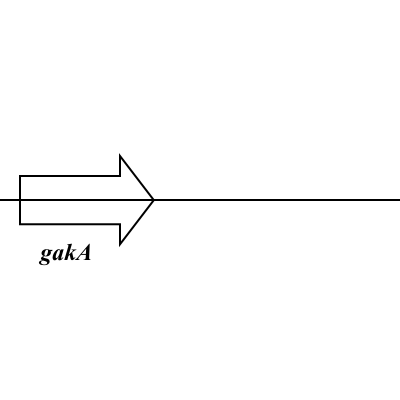

In [11]:
x = 20; y = 200; length = 100
side_a = 80*math.sin(math.radians(25))/math.sin(math.radians(130))
angle2 = ((2*side_a)*math.sin(math.radians(130)))/2
with cairo.SVGSurface("geek95.svg", 400, 400) as surface: 
    line = cairo.Context(surface)
    line.move_to(0, 200)
    line.line_to(400, 200)
    line.stroke()
    context = cairo.Context(surface)
    cr = cairo.Context(surface)
    
    context.move_to(20, 200)
    print(context.get_current_point())
    x += 0; y -= 24
    context.line_to(x, y)
    print(context.get_current_point())
    x += length; y += 0
    context.line_to(x, y)
    print(context.get_current_point())
    x += 0; y -= 20
    context.line_to(x, y)
    print(context.get_current_point())
    x += angle2; y += 44.13512
    context.line_to(x, y)
    print(context.get_current_point())
    
    x -= angle2; y += 44.13512
    context.line_to(x, y)
    print(context.get_current_point())
    x += 0; y -= 20
    context.line_to(x, y)
    print(context.get_current_point())
    x -= length; y += 0
    context.line_to(x, y)
    
    cr.select_font_face("Times New Roman", cairo.FONT_SLANT_ITALIC, 
    cairo.FONT_WEIGHT_BOLD)
    cr.set_font_size(24)
    cr.text_extents("ZetCode")
    cr.move_to((f_endpos[1]-20)/2, 260)    
    cr.show_text(cds_keep[0][2])
    
    x -= 0; y += -24
    context.line_to(x, y)
    context.close_path()
    context.stroke()
IPython.display.SVG("geek95.svg")

5


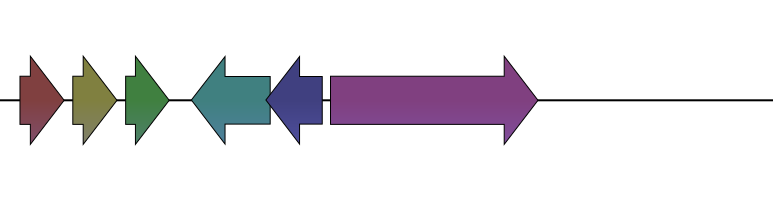

In [374]:
spacing = 0.1
cwidth = (maxval*spacing)+40; cheight = 200
with cairo.SVGSurface("geek100.svg", cwidth, cheight) as surface:
    line = cairo.Context(surface)
    line.move_to(0, f_endpos[1]) 
    line.line_to(cwidth, 100.3) 
    line.stroke() 
    surfaces = [cairo.Context(surface) for i in range(len(cds_names))]
    x_offset = 20
    for i in range(6):
        if i == (len(cds_names)-1) and cds_test[i][0] > cds_test[i][1]:
            myrarrow(surfaces[i], x_offset, cheight/2, abs((cds_test[i][0]-cds_test[i][1])*0.1))
            pattern = cairo.LinearGradient(200, 100, 200, 300)
            pattern.add_color_stop_rgb(0, *list(colorlist[i]))
            pattern.add_color_stop_rgb(1, 0.5, 0.5, 1)

            surfaces[i].set_source(pattern)
            surfaces[i].fill_preserve()
            surfaces[i].set_line_width(1)
            surfaces[i].set_source_rgb(0, 0, 0)
            surfaces[i].stroke()
            break
            
        elif i == (len(cds_names)-1) and cds_test[i][0] < cds_test[i][1]:
            myarrow(surfaces[i], x_offset, cheight/2, abs((cds_test[i][0]-cds_test[i][1])*0.1))
            pattern = cairo.LinearGradient(200, 100, 200, 300)
            pattern.add_color_stop_rgb(0, *list(colorlist[i]))
            pattern.add_color_stop_rgb(1, 0.5, 0.5, 1)

            surfaces[i].set_source(pattern)
            surfaces[i].fill_preserve()
            surfaces[i].set_line_width(1)
            surfaces[i].set_source_rgb(0, 0, 0)
            surfaces[i].stroke()
            break
            
        if cds_test[i][0] > cds_test[i][1]:
            myrarrow(surfaces[i], x_offset, cheight/2, abs((cds_test[i][0]-cds_test[i][1])*0.1))
            pattern = cairo.LinearGradient(200, 100, 200, 300)
            pattern.add_color_stop_rgb(0, *list(colorlist[i]))
            pattern.add_color_stop_rgb(1, 0.5, 0.5, 1)

            surfaces[i].set_source(pattern)
            surfaces[i].fill_preserve()
            surfaces[i].set_line_width(1)
            surfaces[i].set_source_rgb(0, 0, 0)
            surfaces[i].stroke()
            if cds_test[i+1][0] > cds_test[i+1][1]:
                min(cds_test[1][0:2]) - max(cds_test[0][0:2])
                x_offset = f_endpos[0] + (cds_test[i+1][1] - cds_test[i][0])*spacing
            else:
                x_offset = f_endpos[0] + (cds_test[i+1][0] - cds_test[i][0])*spacing
        else:
            myarrow(surfaces[i], x_offset, cheight/2, (cds_test[i][1]-cds_test[i][0])*0.1)
            pattern = cairo.LinearGradient(200, 100, 200, 300)
            pattern.add_color_stop_rgb(0, *list(colorlist[i]))
            pattern.add_color_stop_rgb(1, 0.5, 0.5, 1)

            surfaces[i].set_source(pattern)
            surfaces[i].fill_preserve()
            surfaces[i].set_line_width(1)
            surfaces[i].set_source_rgb(0, 0, 0)
            surfaces[i].stroke()
            if cds_test[i+1][0] > cds_test[i+1][1]:
                x_offset = f_endpos[0] + (cds_test[i+1][1] - cds_test[i][1])*spacing
            else:
                x_offset = f_endpos[0] + (cds_test[1][0] - cds_test[0][1])*spacing
    print(i)
  
        
    
IPython.display.SVG("geek100.svg")

In [216]:
cds_test

[[0, 104, 'gakA'],
 [191, 295, 'gakB'],
 [330, 428, 'gakC'],
 [1102, 650, 'gakI'],
 [1286, 1059, 'cro'],
 [1369, 3108, 'gakT']]

In [357]:
    line = cairo.Context(surface)
    line.move_to(0, f_endpos[1]) 
    line.line_to(f_endpos[0]+20, f_endpos[1]) 
    line.stroke() 

(538.6015625, 100.30078125)
